In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

In [2]:
sns.set(style="whitegrid")

In [3]:
uploaded = files.upload()
df_users = pd.read_csv("6M-0K-99K.users.dataset.public.csv", encoding='latin-1')
df_buyers = pd.read_csv("Buyers-repartition-by-country.csv", encoding='latin-1')
df_sellers = pd.read_csv("Comparison-of-Sellers-by-Gender-and-Country.csv", encoding='latin-1')
df_top_sellers = pd.read_csv("Countries-with-Top-Sellers-(Fashion-C2C).csv", encoding='latin-1')


Saving 6M-0K-99K.users.dataset.public.csv to 6M-0K-99K.users.dataset.public.csv
Saving Buyers-repartition-by-country.csv to Buyers-repartition-by-country.csv
Saving Comparison-of-Sellers-by-Gender-and-Country.csv to Comparison-of-Sellers-by-Gender-and-Country.csv
Saving Countries-with-Top-Sellers-(Fashion-C2C).csv to Countries-with-Top-Sellers-(Fashion-C2C).csv


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


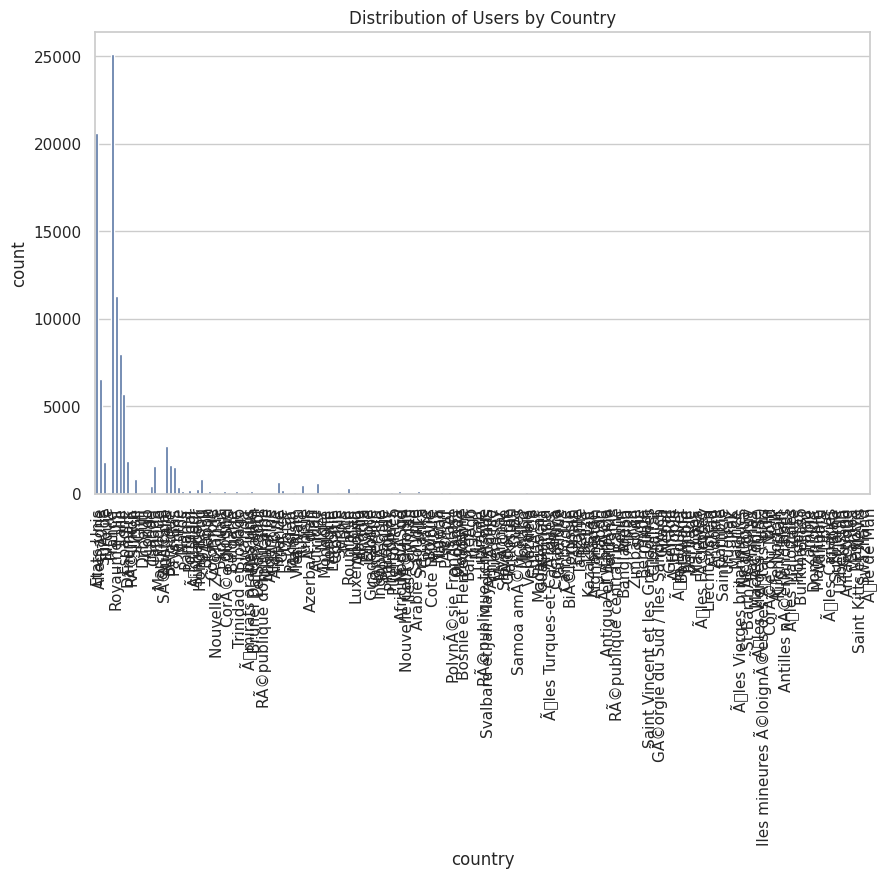

In [4]:
# Plot 1: Distribution of Users by Country
plt.figure(figsize=(10, 6))
sns.countplot(data=df_users, x='country')
plt.title('Distribution of Users by Country')
plt.xticks(rotation=90)
plt.show()

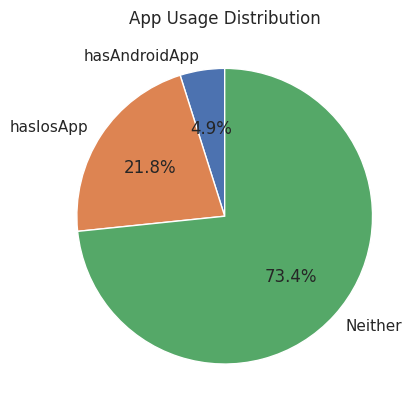

In [5]:
# Plot 2: App Usage Distribution
app_usage = df_users[['hasAndroidApp', 'hasIosApp']].sum()
app_usage['Neither'] = len(df_users) - app_usage.sum()
app_usage.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('App Usage Distribution')
plt.ylabel('')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


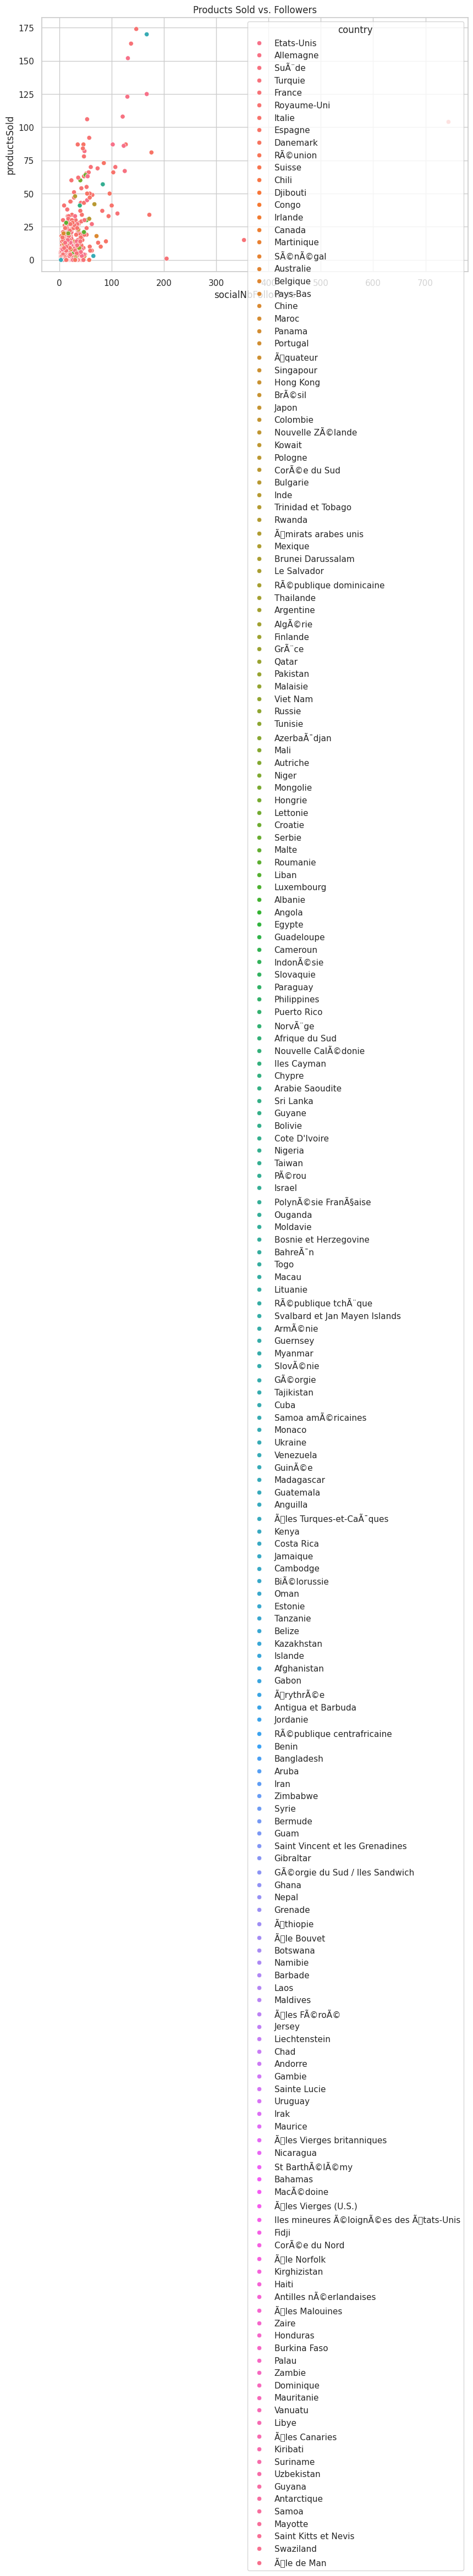

In [6]:
# Plot 3: Products Sold vs. Followers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_users, x='socialNbFollowers', y='productsSold', hue='country')
plt.title('Products Sold vs. Followers')
plt.show()

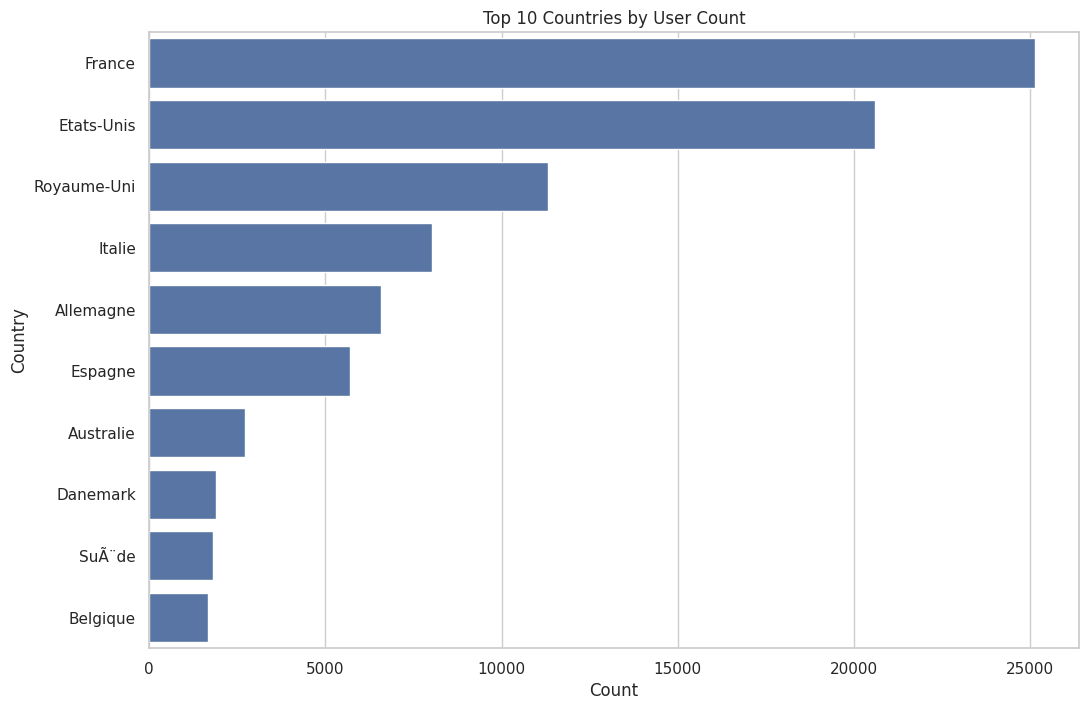

In [7]:
# Plot 4: Top 10 Countries by User Count
plt.figure(figsize=(12, 8))
sns.countplot(y='country', data=df_users, order=df_users['country'].value_counts().index[:10])
plt.title('Top 10 Countries by User Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

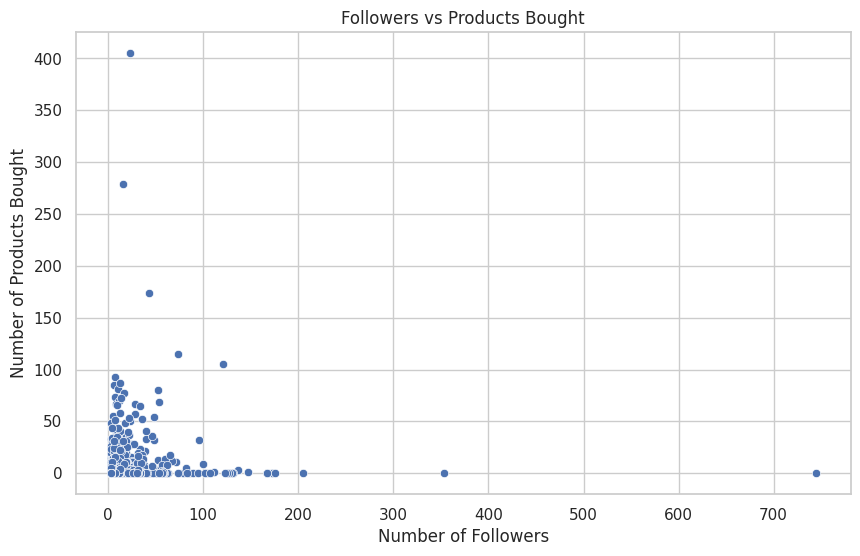

In [8]:
# Plot 5: Followers vs Products Bought
plt.figure(figsize=(10, 6))
sns.scatterplot(x='socialNbFollowers', y='productsBought', data=df_users)
plt.title('Followers vs Products Bought')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Products Bought')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


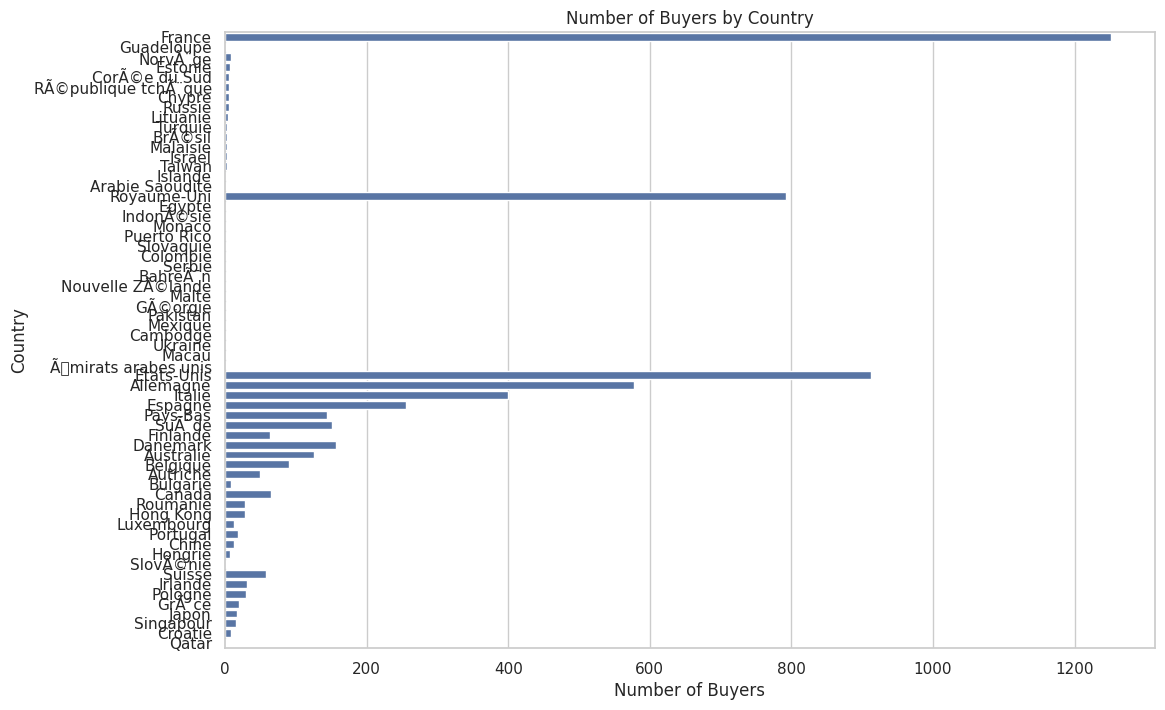

In [9]:
# Plot 6: Number of Buyers by Country
plt.figure(figsize=(12, 8))
sns.barplot(y='country', x='buyers', data=df_buyers, order=df_buyers['country'].value_counts().index)
plt.title('Number of Buyers by Country')
plt.xlabel('Number of Buyers')
plt.ylabel('Country')
plt.show()

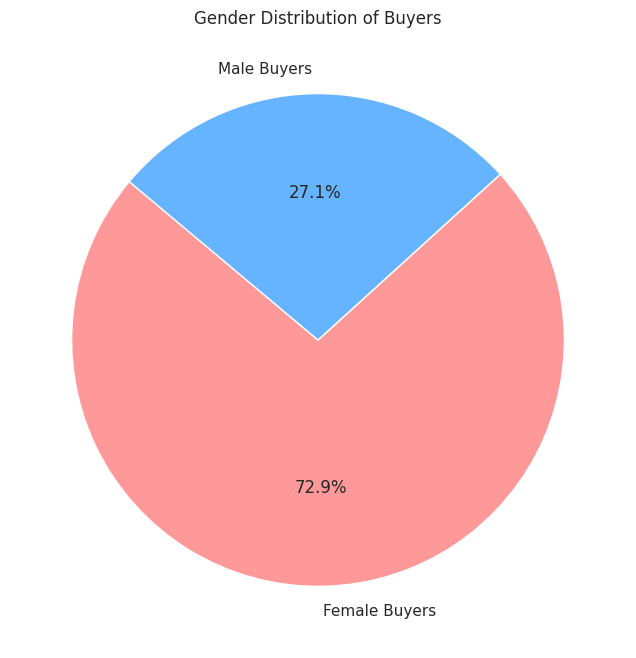

In [10]:
# Plot 7: Gender Distribution of Buyers
gender_counts = df_buyers[['femalebuyers', 'malebuyers']].sum()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Female Buyers', 'Male Buyers'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution of Buyers')
plt.show()

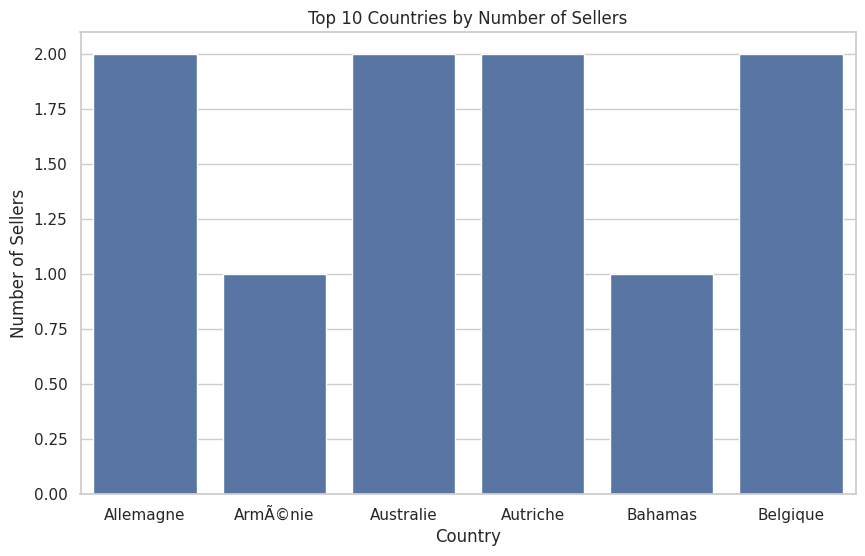

In [13]:
# Plot 10: Top 10 Countries by Number of Sellers
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df_sellers.head(10))
plt.title('Top 10 Countries by Number of Sellers')
plt.xlabel('Country')
plt.ylabel('Number of Sellers')
plt.show()

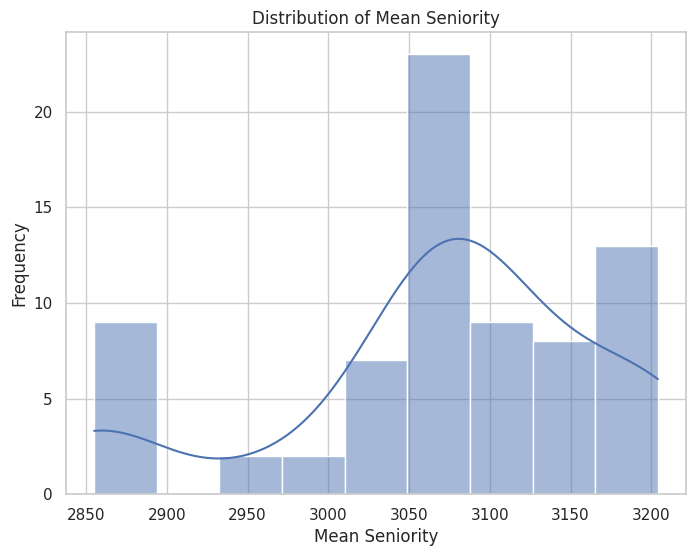

In [15]:
# Plot 12: Distribution of Mean Seniority
plt.figure(figsize=(8, 6))
sns.histplot(df_sellers['meanseniority'], kde=True)
plt.title('Distribution of Mean Seniority')
plt.xlabel('Mean Seniority')
plt.ylabel('Frequency')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
X = df_users.drop(['country'], axis=1)  # features
y = df_users['country']  # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [30]:
# Convert string columns in X_train and X_test to numerical using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Get missing columns in the training test
missing_cols = set(X_train.columns) - set(X_test.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]


rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)  # Now fit the model with numerical data

RandomForestClassifier(random_state=42)

In [31]:
y_pred = rfc.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 99.76%
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

                                 precision    recall  f1-score   support

                    Afghanistan       0.50      1.00      0.67         1
                 Afrique du Sud       1.00      1.00      1.00        23
                        Albanie       1.00      1.00      1.00         6
                       AlgÃ©rie       0.92      1.00      0.96        11
                      Allemagne       1.00      1.00      1.00      1323
                        Andorre       0.67      1.00      0.80         2
                         Angola       0.00      0.00      0.00         2
                       Anguilla       0.00      0.00      0.00         1
             Antigua et Barbuda       0.00      0.00      0.00         0
        Antilles nÃ©erlandaises       0.00      0.00      0.00         0
                Arabie Saoudite       1.00      1.00      1.00        35
                      Argentine       1.00      0.83      0.91        12
                       ArmÃ©nie       1.00      1.

In [34]:
def predict_country(has_android_app, has_ios_app, social_nb_followers, products_sold, products_bought):
    # Create a dictionary to store the input features
    input_features = {
        'hasAndroidApp': [has_android_app],
        'hasIosApp': [has_ios_app],
        'socialNbFollowers': [social_nb_followers],
        'productsSold': [products_sold],
        'productsBought': [products_bought]
    }


In [37]:
# Call the function predict_country and store the returned value
input_features = predict_country(1, 0, 1000, 50, 20)

# Convert the input features to a pandas DataFrame
input_df = pd.DataFrame(input_features)

In [39]:
def predict_country(has_android_app, has_ios_app, social_nb_followers, products_sold, products_bought):
    # Create a dictionary to store the input features
    input_features = {
        'hasAndroidApp': [has_android_app],
        'hasIosApp': [has_ios_app],
        'socialNbFollowers': [social_nb_followers],
        'productsSold': [products_sold],
        'productsBought': [products_bought]
    }

    # Convert the input features to a pandas DataFrame
    input_df = pd.DataFrame(input_features)

    # Convert string columns to numerical using one-hot encoding
    input_df = pd.get_dummies(input_df) # Removed extra indent here

    # Get missing columns in the input features
    missing_cols = set(X_train.columns) - set(input_df.columns)

    # Add a missing column in input features with default value equal to 0
    for c in missing_cols:
        input_df[c] = 0

    # Ensure the order of column in the input features is in the same order than in train set
    input_df = input_df[X_train.columns]

    # Make a prediction using the trained model
    prediction = rfc.predict(input_df)
    return prediction

In [40]:
has_android_app = 1
has_ios_app = 0
social_nb_followers = 100
products_sold = 10
products_bought = 5

predicted_country = predict_country(has_android_app, has_ios_app, social_nb_followers, products_sold, products_bought)
print("Predicted Country:", predicted_country)

<ipython-input-39-236b0a755db0>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[c] = 0
<ipython-input-39-236b0a755db0>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[c] = 0
<ipython-input-39-236b0a755db0>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[c] = 0
<ipytho

Predicted Country: ['Espagne']
